1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.


Global minimum x0 = [ 0.08984184 -0.71265628]
Global minimum x1 = [-0.08984185  0.71265627]

There are two global minima.

Function values at minimum x0: f(x0) =  -1.0316284534896594
Function values at minimum x1: f(x1) =  -1.0316284534896498

With the initial guess equal to (0,0) the "minimize" function does not found a global minima.
Indeed, it has as solution x = [0. 0.]


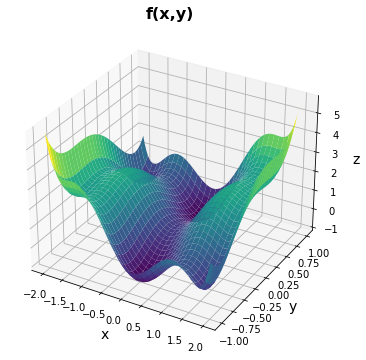

In [17]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from matplotlib import pylab
import matplotlib.pyplot as plt

# Definition of the function f(x,y).
def f(params):
    x = np.array(params[0])
    y = np.array(params[1])
    return (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y + (4*y**2 - 4)*y**2

# Vectors x and y with corresponding limits.
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

xx, yy = np.meshgrid(x,y)
params = [xx, yy]
g = f(params)

# Finding global minima.
initial_guess_x0 = (-2, -1)
x0 = minimize(f, initial_guess_x0, method='BFGS')
initial_guess_x1 = (2, 1)
x1 = minimize(f, initial_guess_x1, method='BFGS')

print('\nGlobal minimum x0 =',x0['x'])
print('Global minimum x1 =',x1['x'])
print('\nThere are two global minima.')
print('\nFunction values at minimum x0: f(x0) = ',f(x0['x']))
print('Function values at minimum x1: f(x1) = ',f(x1['x']))

# Finding global minima with initial guess (x,y) = (0,0).
initial_guess_origin = (0, 0)
origin = minimize(f, initial_guess_origin, method='BFGS')
print('\nWith the initial guess equal to (0,0) the "minimize" function does not found a global minima.')
print('Indeed, it has as solution x =',origin['x'])

# Plot of the function.
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_surface(xx, yy, g, cmap = 'viridis', rstride=3, cstride=3)
ax.set_xlabel('x', size=14)
ax.set_ylabel('y', size=14)
ax.set_zlabel('z', size=14)
plt.title('f(x,y)', size=16, fontweight='bold')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Best parameters for the fitting of max:
 [ 5.73581552  2.29443132 15.77934695 23.09207029]

Best parameters for the fitting of min:
 [  6.16452577  -1.97590082 -61.32094473  52.6492948 ]


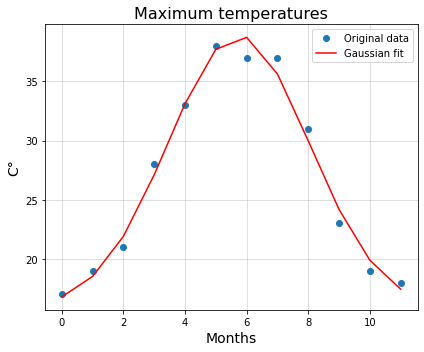

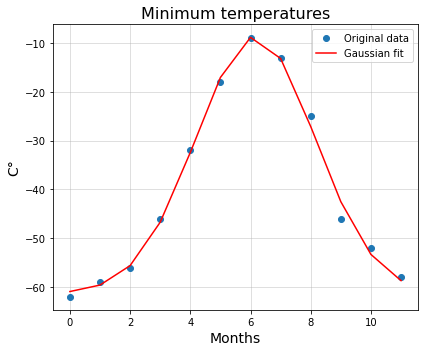

In [18]:
from scipy.stats import norm
from scipy.integrate import trapz 
from scipy.optimize import curve_fit
import math

# Definition of the fitting function.
def gaussian_pdf(x, mean, std, offset, scale):
    return offset+scale*np.exp(-0.5*((x-mean)/std)**2)

# Temperature vectors.
xdata_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
xdata_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Month vector.
months = np.arange(0,12,1)

# Finding best parameters for max temperatures.
popt_max, _ = curve_fit(gaussian_pdf, months, xdata_max, p0=[5, 5, 5, 5])
print('Best parameters for the fitting of max:\n', popt_max)
yopt_max = gaussian_pdf(months, popt_max[0], popt_max[1], popt_max[2], popt_max[3])

# Finding best parameters for min temperatures.
popt_min, _ = curve_fit(gaussian_pdf, months, xdata_min, p0=[5, 5, -30, 5])
print('\nBest parameters for the fitting of min:\n', popt_min)
yopt_min = gaussian_pdf(months, popt_min[0], popt_min[1], popt_min[2], popt_min[3])

# Plot maximum temperatures with the corresponding fit.
fig1 = plt.subplots(tight_layout=True, figsize = (6,5))
plt.plot(months, xdata_max, 'o')
plt.plot(months, yopt_max, 'r')
plt.xlabel('Months', size=14)
plt.ylabel('C°', size=14)
plt.title('Maximum temperatures', size=16)
plt.legend(['Original data', 'Gaussian fit'])
plt.grid(alpha=0.5)

# Plot minimum temperatures with the corresponding fit.
fig2 = plt.subplots(tight_layout=True, figsize = (6,5))
plt.plot(months, xdata_min, 'o')
plt.plot(months, yopt_min, 'r')
plt.xlabel('Months', size=14)
plt.ylabel('C°', size=14)
plt.title('Minimum temperatures', size=16)
plt.legend(['Original data', 'Gaussian fit'])
plt.grid(alpha=0.5)

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Best parameters for the fitting of the histogram:
 [-1.02973477e-01 -1.80884347e-01  4.47242797e+02  6.73756335e+01]


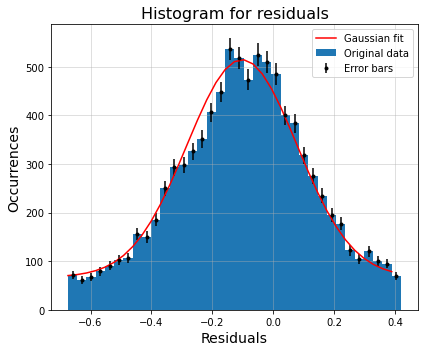

n degrees of freedom = 36

chi2 =  49.50253751144706

p-value = 0.06635742176181691

The p-values is grater than 0.05 hence the fit is satisfactory.


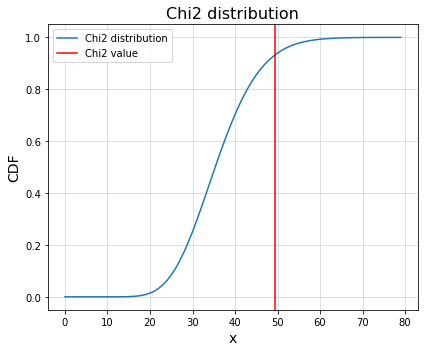

In [19]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import pickle
import pandas as pd
from scipy.special import factorial
import scipy.stats

# Read the data.
filename = "data/residuals_261.pkl"
data = pd.read_pickle(filename)

# Convert the pandas dataframe into a dictionary.
my_dict = dict(data.item())

# Extract residuals.
res = np.asarray(my_dict['residuals'])

# Filter the data in order to obtain a meaningful histogram.
occurrences, bin_edges = np.histogram(res, bins=5670)
filtered = np.where(occurrences>=61)
bin_edges = bin_edges[filtered]

# Definition of the fitting function.
def f(x, mean, std, scale,offset):
    return offset+scale*np.exp(-0.5*((x-mean)/std)**2)

fig1 = plt.subplots(tight_layout=True, figsize = (6,5))

# Plot the histogram.
h = plt.hist(res, bins=bin_edges)

entries = h[0]
bins = h[1]
bincenters = 0.5*(bins[1:]+bins[:-1])
bins = bins[0:len(h[1])-1]

# Finding best parameters for the data.
popt, _ = curve_fit(f, bins, entries, p0=[0, 2, 100, 30])
print('Best parameters for the fitting of the histogram:\n', popt)
fit = f(bins, popt[0], popt[1], popt[2], popt[3])

# Plot the histogram fit.
plt.plot(bins, fit, 'r')

# Compute the Poisson uncertainty.
sigma = np.sqrt(np.abs(entries))

# Plot errorbar.
plt.errorbar(bincenters, entries, sigma, fmt='.k')

plt.title('Histogram for residuals', size=16)
plt.xlabel('Residuals', size=14)
plt.ylabel('Occurrences', size=14)
plt.legend(['Gaussian fit', 'Original data', 'Error bars'])
plt.grid(alpha=0.5)
plt.show()

# Degree of freedom.
ndof = len(bins)
print("n degrees of freedom =", ndof)

# Compute the Chi2 value.
chi2 = np.sum(((entries-fit)**2)/sigma**2)
print("\nchi2 = ", chi2)

# Compute the p-value.
pvalue = 1 - scipy.stats.chi2.cdf(chi2, ndof)
print('\np-value =', pvalue)
print('\nThe p-values is grater than 0.05 hence the fit is satisfactory.')

p = np.arange(0, 80, 1)
fig2 = plt.subplots(tight_layout=True, figsize = (6,5))
plt.plot(p, scipy.stats.chi2.cdf(p, df=ndof))
plt.fill_between(bins, entries, where=(bins > chi2), color='lightblue')
plt.axvline(chi2, color='r')
plt.title('Chi2 distribution', size=16)
plt.xlabel('x', size=14)
plt.ylabel('CDF', size=14)
plt.legend(['Chi2 distribution', 'Chi2 value'])
plt.grid(alpha=0.5)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

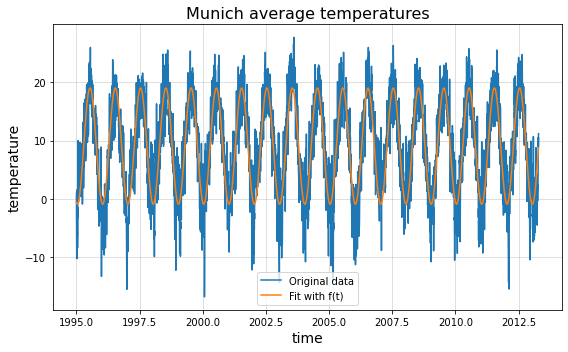

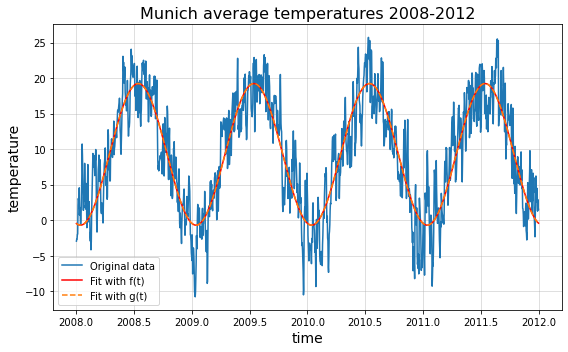

Best-fit values for f(x): a = -9.962034678009333  b = 6.0485575505895115  c = 9.262821312212393

Overall average temperature in Munich: 8.933222104668378

Typical daily average value predicted by the model for the coldest time of year: 2.86°
Typical daily average value predicted by the model for the hottest time of year: 18.26°

The parameter b indicates a horizontal translation of the function f(x).
Physical sense of b: as we can see from the first plot, that contains all data, the function has the value
f(0) = 0.944444 . This value is closer to the the minimum of f(x) rather than its maximum indeed, the first
temperatures correspond to the month of Jenuary (so they are low). However, the cosine, without initial phase,
has the maximum in 0. Therefore the parameter b indicates the shift from the maximum temperature.

Best-fit values for g(x):
a = -9.960751793854822  b = 1.0002934180660268  c = -2523.4976789411435  d = 9.265674157773766

SSR for f(x) = 18669.51539457836
SSR for g(x) = 1

In [20]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

# Read the data.
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')

# Vector for the time.
time = np.zeros(len(data))

# Vector for the temperature.
temp = np.zeros(len(data))

for i in range(len(data)):
    tmp = data[i]
    time[i] = tmp[0]
    temp[i] = tmp[1]

# Filter the data in order to remove the peaks.
mask1 = np.where(np.abs(temp)<30) 
time = time[mask1]
temp = temp[np.abs(temp)<30]

# Definition of fitting functions.
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t+b)+c

def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t+c)+d

# Finding best parameters for the data.
popt, _ = curve_fit(f, time, temp, p0=[10, 5, 10])
fit = f(time, popt[0], popt[1], popt[2])

# Plot data with coresspondent fit.
fig1 = plt.subplots(tight_layout=True, figsize = (8,5))
plt.plot(time, temp)
plt.plot(time, fit)
plt.title('Munich average temperatures', size=16)
plt.xlabel('time', size=14)
plt.ylabel('temperature', size=14)
plt.legend(['Original data', 'Fit with f(t)'])
plt.grid(alpha=0.5)
plt.show()

# Filter to obtain measurements in the time interval 2008-2012
mask2a = np.where(time>=2008)
temp_range = temp[mask2a]
time_range = time[time>=2008]

mask2b = np.where(time_range<=2012)
temp_range = temp_range[mask2b]
time_range = time_range[time_range<=2012]

# Finding best parameters for the data.
popt_range, _ = curve_fit(f, time_range, temp_range, p0=[10, 5, 10])
fit_range = f(time_range, popt_range[0], popt_range[1], popt_range[2])

popt_range_g, _ = curve_fit(g, time_range, temp_range, p0=[10, 0.8, 5, 10])
fit_range_g = g(time_range, popt_range_g[0], popt_range_g[1], popt_range_g[2], popt_range_g[3])

# Plot data in the time interval 2008-2012 with coresspondent fit.
fig2 = plt.subplots(tight_layout=True, figsize = (8,5))
plt.plot(time_range, temp_range)
plt.plot(time_range, fit_range, 'r')
plt.plot(time_range, fit_range_g, linestyle='dashed')
plt.title('Munich average temperatures 2008-2012', size=16)
plt.xlabel('time', size=14)
plt.ylabel('temperature', size=14)
plt.legend(['Original data', 'Fit with f(t)', 'Fit with g(t)'])
plt.grid(alpha=0.5)
plt.show()

print('Best-fit values for f(x): a =', popt_range[0],' b =', popt_range[1], ' c =', popt_range[2])

print('\nOverall average temperature in Munich:',np.mean(temp))

# Filter to obtain measurements in the time interval equal to one year (in this case 2008).
mask3a = np.where(time>=2008)
temp_one_year = temp[mask3a]
fit_one_year = temp[mask3a]
time_one_year = time[time>=2008]

mask3b = np.where(time_one_year<=2009)
temp_one_year = temp_one_year[mask3b]
fit_one_year = fit_one_year[mask3b]
time_one_year = time_one_year[time_one_year<=2009]

# Mean temperature during coldest months. 
# The first 60 measurements correspond to the month of January and February.
print('\nTypical daily average value predicted by the model for the coldest time of year: %.2f°' % np.mean(fit_one_year[0:60]))

# Mean temperature during warmest months. 
# The measurements in the range [180-240] correspond to the month of July and August.
print('Typical daily average value predicted by the model for the hottest time of year: %.2f°' % np.mean(fit_one_year[180:240]))

# Meaning of the parameter b.
print('\nThe parameter b indicates a horizontal translation of the function f(x).')
print('Physical sense of b: as we can see from the first plot, that contains all data, the function has the value')
print('f(0) =',temp[0],'. This value is closer to the the minimum of f(x) rather than its maximum indeed, the first')
print('temperatures correspond to the month of Jenuary (so they are low). However, the cosine, without initial phase,')
print('has the maximum in 0. Therefore the parameter b indicates the shift from the maximum temperature.')

print('\nBest-fit values for g(x):\na =', popt_range_g[0],' b =', popt_range_g[1], ' c =', popt_range_g[2], ' d =', popt_range_g[3])

# Compute the SSR.
SSR_f = np.sum(((fit_range-temp_range)**2))
SSR_g = np.sum(((fit_range_g-temp_range)**2))

print('\nSSR for f(x) =', SSR_f)
print('SSR for g(x) =', SSR_g)

# Perform the F_test.
n1 = 3 # Degree of freedom of f.
n2 = 4 # Degree of freedom of g.
N = len(time_range)

def Ftest(SSR_f, SSR_g, n1, n2, N, verbose=False):
    F = ((SSR_f-SSR_g)/(n2-n1))/(SSR_g/(N-n2))
    CL = 1. - scipy.stats.f.cdf(F, n2-n1, N-n2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

f_vs_g = Ftest(SSR_f, SSR_g, n1, n2, N, verbose=True)